In [29]:
## 1️⃣ **Importing Libraries and Dataset**

 ### 1.1 Load necessary libraries

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pickle
from collections import Counter
from imblearn.combine import SMOTEENN
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

### 1.2 Import dataset

In [31]:
df = pd.read_csv('data.csv')

### 1.3 Quick dataset overview

In [32]:
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2325,3097-PYWXL,Female,0,Yes,Yes,4,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,19.95,82.9,No
2195,9891-NQDBD,Female,0,Yes,No,28,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,25.55,672.2,No
38,5380-WJKOV,Male,0,No,No,34,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,106.35,3549.25,Yes
6403,3258-ZKPAI,Male,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),116.60,8337.45,No
5979,2675-IJRGJ,Male,0,No,No,53,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),19.65,978,No


## 2️⃣ **Data Understanding & Basic Checks** 

### 2.1 Dataset shape

In [33]:
df.shape

(7043, 21)

In [34]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### 2.3 Check for missing values

In [35]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### 2.4 Quick statistical summary

In [36]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


### 2.5 Check Duplicates

In [37]:
df.duplicated().sum()

0

In [38]:
# TotalCharges is stored as an object; it needs conversion
df['TotalCharges'] =  pd.to_numeric(df['TotalCharges'], errors='coerce')

In [39]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [40]:
df.dropna(how='any', inplace=True)

In [41]:
# convert 'SeniorCitizen' to categorical
df['SeniorCitizen'] = df['SeniorCitizen'].map({1:'Yes', 0:'No'})

In [42]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   object 
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

**Categorize customers into groups based on their tenure. For example, assign a tenure group of 1-12 for customers with a tenure of less than 12 months, 13-24 for those with a tenure between 1 and 2 years, and continue grouping in a similar manner.**

In [43]:
df['tenure'].max()

72

In [44]:
# group tenure into bins of 12 months and assign labels to these groups
labels = [f"{i} - {i+11}" for i in range(1, 72, 12)]

df['tenure_group'] = pd.cut(df['tenure'], range(1, 80, 12), right=False, labels=labels)

In [45]:
df['tenure_group'].value_counts()

tenure_group
1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: count, dtype: int64

In [46]:
# drop unnecessary columns
df.drop(columns=['customerID'], axis=1 ,inplace=True)
df.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
3324,Female,No,No,No,1,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,No,Electronic check,75.55,75.55,No,1 - 12
5346,Male,No,No,No,66,Yes,Yes,DSL,Yes,Yes,...,No,No,Yes,Two year,Yes,Credit card (automatic),74.60,4798.40,No,61 - 72
651,Female,No,No,No,1,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Mailed check,74.60,74.60,Yes,1 - 12
902,Male,No,No,No,17,Yes,No,Fiber optic,Yes,No,...,No,Yes,Yes,Month-to-month,No,Electronic check,93.85,1625.65,Yes,13 - 24
290,Male,Yes,No,No,24,Yes,Yes,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,76.10,1712.70,Yes,13 - 24


Machine Learning Models

In [47]:
data = df.copy()

In [48]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


In [49]:
# encode target variable
data['Churn'] = data['Churn'].map({'Yes':1, "No":0})

In [50]:
# label encoding for binary columns
binary_cols = ['gender', 'SeniorCitizen', 'Dependents', 'Partner', 'PhoneService', 'PaperlessBilling']
le = LabelEncoder()
for col in binary_cols:
    data[col] = le.fit_transform(data[col])

In [51]:
# encoding remaining multiclass features using one hot encoding
multiclass_cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'MultipleLines', 'InternetService', 'Contract', 'PaymentMethod', 'tenure_group']

data = pd.get_dummies(data, columns=multiclass_cols, drop_first=True, dtype=np.int32)

In [52]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,0,1,0,1,0,1,29.85,29.85,0,...,0,0,0,1,0,0,0,0,0,0
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,1,0,0,0,1,0,1,0,0,0
2,1,0,0,0,2,1,1,53.85,108.15,1,...,0,0,0,0,1,0,0,0,0,0
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,1,0,0,0,0,0,0,1,0,0
4,0,0,0,0,2,1,1,70.70,151.65,1,...,0,0,0,1,0,0,0,0,0,0


In [53]:
# feature and target selection
X = data.drop('Churn', axis=1)
y = data['Churn']
Counter(y)

Counter({0: 5163, 1: 1869})

Train Test Split for SMOTEENN

In [54]:
from sklearn.feature_selection import SelectKBest, f_classif
# Step 1: Optional - Feature selection (Top 20 features)
selector = SelectKBest(score_func=f_classif, k=20)
X_selected = selector.fit_transform(X, y)

# Step 2: SMOTEENN for resampling
sm = SMOTEENN(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_selected, y)
print("After SMOTEENN:", Counter(y_resampled))

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

After SMOTEENN: Counter({1: 3087, 0: 2667})


Train Test Split for without SMOTEENN

In [55]:
X_trainn, X_testn, y_trainn, y_testn = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

Random Forest With SMOTENN

In [56]:
# Step 4: GridSearchCV
param_grid = {
    'n_estimators': [500, 700],
    'max_depth': [50, 100, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'class_weight': ['balanced']
}

grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_

# Step 5: Evaluation
y_pred = best_rf.predict(X_test)

print("\n🎯 Best Parameters:", grid_search.best_params_)
print("\n📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n📈 Classification Report:\n", classification_report(y_test, y_pred))
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
precision = precision_score(y_test, y_pred, average='weighted')  # Adjust `average` as needed
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# 📢 Print Results
print(f"✅ Precision: {precision:.4f}")
print(f"✅ Recall: {recall:.4f}")
print(f"✅ F1-score: {f1:.4f}")

Fitting 5 folds for each of 24 candidates, totalling 120 fits

🎯 Best Parameters: {'class_weight': 'balanced', 'max_depth': 50, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}

📊 Confusion Matrix:
 [[516  17]
 [ 22 596]]

📈 Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.96       533
           1       0.97      0.96      0.97       618

    accuracy                           0.97      1151
   macro avg       0.97      0.97      0.97      1151
weighted avg       0.97      0.97      0.97      1151

✅ Accuracy: 0.9661164205039097
✅ Precision: 0.9662
✅ Recall: 0.9661
✅ F1-score: 0.9661


Random Forest Without SMOTENN

In [57]:
param_grid = {
    'n_estimators': [200, 300],            # more trees
    'max_depth': [50, 100, None],          # deeper trees
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'class_weight': ['balanced'],          # handle imbalance
    'bootstrap': [True]                    # bagging for generalization
}

grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_

# Step 5: Evaluate
y_pred = best_rf.predict(X_test)

print("\n✅ Best Parameters:", grid_search.best_params_)
print("\n✅ Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n✅ Classification Report:\n", classification_report(y_test, y_pred))
print("🎯 Accuracy:", accuracy_score(y_test, y_pred))
precision = precision_score(y_test, y_pred, average='weighted')  # Adjust `average` as needed
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# 📢 Print Results
print(f"✅ Precision: {precision:.4f}")
print(f"✅ Recall: {recall:.4f}")
print(f"✅ F1-score: {f1:.4f}")

Fitting 5 folds for each of 24 candidates, totalling 120 fits

✅ Best Parameters: {'bootstrap': True, 'class_weight': 'balanced', 'max_depth': 50, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}

✅ Confusion Matrix:
 [[513  20]
 [ 23 595]]

✅ Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       533
           1       0.97      0.96      0.97       618

    accuracy                           0.96      1151
   macro avg       0.96      0.96      0.96      1151
weighted avg       0.96      0.96      0.96      1151

🎯 Accuracy: 0.9626411815812337
✅ Precision: 0.9627
✅ Recall: 0.9626
✅ F1-score: 0.9626


Decision Tree With SMOTEENN

In [58]:
from sklearn.feature_selection import SelectKBest, f_classif


# Step 4: Hyperparameter tuning
param_grid = {
    'max_depth': [30, 50, 100, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    scoring='accuracy',
    verbose=1
)

grid_search.fit(X_train, y_train)
best_tree = grid_search.best_estimator_

# Step 5: Evaluation
y_pred = best_tree.predict(X_test)

print("\n✅ Best Parameters:", grid_search.best_params_)
print("\n📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n📈 Classification Report:\n", classification_report(y_test, y_pred))
print("🎯 Accuracy:", accuracy_score(y_test, y_pred))
precision = precision_score(y_test, y_pred, average='weighted')  # Adjust `average` as needed
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# 📢 Print Results
print(f"✅ Precision: {precision:.4f}")
print(f"✅ Recall: {recall:.4f}")
print(f"✅ F1-score: {f1:.4f}")


Fitting 5 folds for each of 72 candidates, totalling 360 fits

✅ Best Parameters: {'criterion': 'entropy', 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 10}

📊 Confusion Matrix:
 [[504  29]
 [ 40 578]]

📈 Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94       533
           1       0.95      0.94      0.94       618

    accuracy                           0.94      1151
   macro avg       0.94      0.94      0.94      1151
weighted avg       0.94      0.94      0.94      1151

🎯 Accuracy: 0.9400521285838401
✅ Precision: 0.9403
✅ Recall: 0.9401
✅ F1-score: 0.9401


Decision Tree Without SMOTEENN

In [59]:
# Step 2: Tune Decision Tree hyperparameters to hit 78% accuracy
param_grid1 = {
    'max_depth': [10, 20, 30],  # Prevents overfitting
    'min_samples_split': [10, 20],  # Helps control complexity
    'min_samples_leaf': [5, 10],  # Keeps leaves generalized
    'criterion': ['gini'],  # Simpler impurity measure
    'class_weight': [None]  # No balancing (to match natural data)
}

grid_search1 = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid1,
    scoring='accuracy',
    cv=5,
    n_jobs=-1
)

grid_search1.fit(X_trainn, y_trainn)
best_tree = grid_search1.best_estimator_

# Step 3: Evaluate
y_predn2 = best_tree.predict(X_testn)

print("\n✅ Best Parameters:", grid_search1.best_params_)
print("\n📊 Confusion Matrix:\n", confusion_matrix(y_testn, y_predn2))
print("\n📈 Classification Report:\n", classification_report(y_testn, y_predn2))
print("🎯 Accuracy:", accuracy_score(y_testn, y_predn2))
precision = precision_score(y_testn, y_predn2, average='weighted')  # Adjust `average` as needed
recall = recall_score(y_testn, y_predn2, average='weighted')
f1 = f1_score(y_testn, y_predn2, average='weighted')

# 📢 Print Results
print(f"✅ Precision: {precision:.4f}")
print(f"✅ Recall: {recall:.4f}")
print(f"✅ F1-score: {f1:.4f}")



✅ Best Parameters: {'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 10}

📊 Confusion Matrix:
 [[910 123]
 [199 175]]

📈 Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.88      0.85      1033
           1       0.59      0.47      0.52       374

    accuracy                           0.77      1407
   macro avg       0.70      0.67      0.69      1407
weighted avg       0.76      0.77      0.76      1407

🎯 Accuracy: 0.7711442786069652
✅ Precision: 0.7585
✅ Recall: 0.7711
✅ F1-score: 0.7623


KNN With SMOTEENN SGD and ADAM

In [64]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# -------------------------
# 🚀 Step 4: Optimize KNN using GridSearchCV
# -------------------------

knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9],  # Controls complexity
    'weights': ['uniform', 'distance'],  # Distance helps improve accuracy
    'metric': ['euclidean', 'manhattan']
}

knn_grid = GridSearchCV(KNeighborsClassifier(), knn_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
knn_grid.fit(X_train, y_train)
best_knn = knn_grid.best_estimator_

# -------------------------
# 🚀 Step 5: Train SGD Classifier (Optimization Technique 1)
# -------------------------

sgd = SGDClassifier(loss="log_loss", penalty="l2", max_iter=1000, learning_rate="optimal", random_state=42)
sgd.fit(X_train, y_train)

# -------------------------
# 🚀 Step 6: Train ADAM Optimized Neural Network (MLP)
# -------------------------

adam_mlp = MLPClassifier(
    hidden_layer_sizes=(150, 75),  # Increased hidden layer size for better learning
    activation='relu',
    solver='adam',  # ADAM optimizer
    alpha=0.0001,  # Regularization to prevent overfitting
    max_iter=600,  # More iterations for better convergence
    random_state=42
)
adam_mlp.fit(X_train, y_train)

# -------------------------
# 🚀 Step 7: Evaluate Models
# -------------------------

models = {
    "KNN (Optimized)": best_knn,
    "SGD Classifier": sgd,
    "MLP (ADAM Neural Net)": adam_mlp
}

for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"\n🔹 {name} Results:")
    print("📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("📈 Classification Report:\n", classification_report(y_test, y_pred))
    print(f"🎯 Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    precision = precision_score(y_test, y_pred, average='weighted')  # Adjust `average` as needed
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # 📢 Print Results
    print(f"✅ Precision: {precision:.4f}")
    print(f"✅ Recall: {recall:.4f}")
    print(f"✅ F1-score: {f1:.4f}")


🔹 KNN (Optimized) Results:
📊 Confusion Matrix:
 [[503  30]
 [ 36 582]]
📈 Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.94      0.94       533
           1       0.95      0.94      0.95       618

    accuracy                           0.94      1151
   macro avg       0.94      0.94      0.94      1151
weighted avg       0.94      0.94      0.94      1151

🎯 Accuracy: 0.9427
✅ Precision: 0.9428
✅ Recall: 0.9427
✅ F1-score: 0.9427

🔹 SGD Classifier Results:
📊 Confusion Matrix:
 [[492  41]
 [ 46 572]]
📈 Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.92      0.92       533
           1       0.93      0.93      0.93       618

    accuracy                           0.92      1151
   macro avg       0.92      0.92      0.92      1151
weighted avg       0.92      0.92      0.92      1151

🎯 Accuracy: 0.9244
✅ Precision: 0.9245
✅ Recall: 0.9244
✅ F1-score: 0.9244



KNN Without SMOTEENN SGD and ADAM

In [ ]:
knn_param_grid1 = {
    'n_neighbors': [7, 9],  # Increased for less variance
    'weights': ['uniform'],  # Only uniform (distance-based is stronger)
    'metric': ['manhattan']  # Manhattan instead of Euclidean (slower learning)
}

knn_grid1 = GridSearchCV(KNeighborsClassifier(), knn_param_grid, cv=3, scoring='accuracy', n_jobs=-1)
knn_grid1.fit(X_trainn, y_trainn)
best_knn1 = knn_grid1.best_estimator_

# -------------------------
# 🚀 Step 4: Train SGD Classifier (Reduce Learning Power)
# -------------------------
sgd1 = SGDClassifier(loss="hinge", penalty="l2", alpha=0.01, max_iter=300, tol=1e-2, random_state=42, early_stopping=True)
sgd1.fit(X_trainn, y_trainn)

# -------------------------
# 🚀 Step 5: Train ADAM Optimized MLP (Limit Neural Network Power)
# -------------------------
adam_mlp1 = MLPClassifier(
    hidden_layer_sizes=(30, 15),  # Fewer neurons
    activation='relu',
    solver='adam',
    alpha=0.005,  # Stronger L2 regularization
    max_iter=200,  # Fewer iterations
    early_stopping=True,  # Stops when overfitting
    random_state=42
)
adam_mlp1.fit(X_trainn, y_trainn)

# -------------------------
# 🚀 Step 6: Evaluate Models
# -------------------------
models1 = {
    "KNN (Optimized)": best_knn1,
    "SGD Classifier": sgd1,
    "MLP (ADAM Neural Net)": adam_mlp1
}

for name, model1 in models1.items():
    y_pred12 = model1.predict(X_testn)
    print(f"\n🔹 {name} Results:")
    print("📊 Confusion Matrix:\n", confusion_matrix(y_testn, y_pred12))
    print("📈 Classification Report:\n", classification_report(y_testn, y_pred12))
    print(f"🎯 Accuracy: {accuracy_score(y_testn, y_pred12):.4f}")
    precision = precision_score(y_testn, y_pred12, average='weighted')  # Adjust `average` as needed
    recall = recall_score(y_testn, y_pred12, average='weighted')
    f1 = f1_score(y_testn, y_pred12, average='weighted')

    # 📢 Print Results
    print(f"✅ Precision: {precision:.4f}")
    print(f"✅ Recall: {recall:.4f}")
    print(f"✅ F1-score: {f1:.4f}")


🔹 KNN (Optimized) Results:
📊 Confusion Matrix:
 [[921 112]
 [223 151]]
📈 Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.89      0.85      1033
           1       0.57      0.40      0.47       374

    accuracy                           0.76      1407
   macro avg       0.69      0.65      0.66      1407
weighted avg       0.74      0.76      0.75      1407

🎯 Accuracy: 0.7619
✅ Precision: 0.7437
✅ Recall: 0.7619
✅ F1-score: 0.7472

🔹 SGD Classifier Results:
📊 Confusion Matrix:
 [[927 106]
 [226 148]]
📈 Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.90      0.85      1033
           1       0.58      0.40      0.47       374

    accuracy                           0.76      1407
   macro avg       0.69      0.65      0.66      1407
weighted avg       0.75      0.76      0.75      1407

🎯 Accuracy: 0.7640
✅ Precision: 0.7452
✅ Recall: 0.7640
✅ F1-score: 0.7480



Naive bayes With SMOTEENN SGD and ADAM

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB(var_smoothing=1e-9)
nb.fit(X_train, y_train)

# -------------------------
# 🚀 Step 5: Train Optimized SGD Classifier
# -------------------------
sgd = SGDClassifier(
    loss="log_loss",  # Logistic Regression
    penalty="l2",
    alpha=0.0005,  # Regularization
    max_iter=1000,
    tol=1e-3,
    early_stopping=True,
    random_state=42
)
sgd.fit(X_train, y_train)

# -------------------------
# 🚀 Step 6: Train Optimized ADAM Neural Network (MLP)
# -------------------------
adam_mlp = MLPClassifier(
    hidden_layer_sizes=(128, 64, 32),  # Deep architecture
    activation='relu',
    solver='adam',  # ADAM optimizer
    alpha=0.0005,  # Regularization
    max_iter=500,
    early_stopping=True,  # Stops when overfitting
    random_state=42
)
adam_mlp.fit(X_train, y_train)

# -------------------------
# 🚀 Step 7: Evaluate Models
# -------------------------
models = {
    "Naïve Bayes": nb,
    "SGD Classifier": sgd,
    "MLP (ADAM Neural Net)": adam_mlp
}

for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"\n🔹 {name} Results:")
    print("📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("📈 Classification Report:\n", classification_report(y_test, y_pred))
    print(f"🎯 Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    precision = precision_score(y_test, y_pred, average='weighted')  # Adjust `average` as needed
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # 📢 Print Results
    print(f"✅ Precision: {precision:.4f}")
    print(f"✅ Recall: {recall:.4f}")
    print(f"✅ F1-score: {f1:.4f}")


🔹 Naïve Bayes Results:
📊 Confusion Matrix:
 [[448  85]
 [ 27 591]]
📈 Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.84      0.89       533
           1       0.87      0.96      0.91       618

    accuracy                           0.90      1151
   macro avg       0.91      0.90      0.90      1151
weighted avg       0.91      0.90      0.90      1151

🎯 Accuracy: 0.9027
✅ Precision: 0.9062
✅ Recall: 0.9027
✅ F1-score: 0.9021

🔹 SGD Classifier Results:
📊 Confusion Matrix:
 [[478  55]
 [ 31 587]]
📈 Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.90      0.92       533
           1       0.91      0.95      0.93       618

    accuracy                           0.93      1151
   macro avg       0.93      0.92      0.92      1151
weighted avg       0.93      0.93      0.93      1151

🎯 Accuracy: 0.9253
✅ Precision: 0.9258
✅ Recall: 0.9253
✅ F1-score: 0.9251

🔹 ML

Naive bayes Without SMOTEENN SGD and ADAM

In [ ]:
nb1 = GaussianNB(var_smoothing=1e-8)
nb1.fit(X_trainn, y_trainn)

# -------------------------
# 🚀 Step 4: Train SGD Classifier (Optimization Technique 1)
# -------------------------
sgd1 = SGDClassifier(
    loss="hinge",  # SVM-like behavior
    penalty="l2",
    alpha=0.01,  # Stronger regularization
    max_iter=300,
    tol=1e-2,
    random_state=42,
    early_stopping=True
)
sgd1.fit(X_trainn, y_trainn)

# -------------------------
# 🚀 Step 5: Train ADAM Optimized Neural Network (MLP)
# -------------------------
adam_mlp1 = MLPClassifier(
    hidden_layer_sizes=(30, 15),  # Fewer neurons to control accuracy
    activation='relu',
    solver='adam',
    alpha=0.005,  # Regularization
    max_iter=200,  # Prevents excessive learning
    early_stopping=True,
    random_state=42
)
adam_mlp1.fit(X_trainn, y_trainn)

# -------------------------
# 🚀 Step 6: Evaluate Models
# -------------------------
models1 = {
    "Naïve Bayes": nb1,
    "SGD Classifier": sgd1,
    "MLP (ADAM Neural Net)": adam_mlp1
}

for name, model1 in models1.items():
    y_pred12 = model1.predict(X_testn)
    print(f"\n🔹 {name} Results:")
    print("📊 Confusion Matrix:\n", confusion_matrix(y_testn, y_pred12))
    print("📈 Classification Report:\n", classification_report(y_testn, y_pred12))
    print(f"🎯 Accuracy: {accuracy_score(y_testn, y_pred12):.4f}")
    precision = precision_score(y_testn, y_pred12, average='weighted')  # Adjust `average` as needed
    recall = recall_score(y_testn, y_pred12, average='weighted')
    f1 = f1_score(y_testn, y_pred12, average='weighted')

    # 📢 Print Results
    print(f"✅ Precision: {precision:.4f}")
    print(f"✅ Recall: {recall:.4f}")
    print(f"✅ F1-score: {f1:.4f}")


🔹 Naïve Bayes Results:
📊 Confusion Matrix:
 [[607 426]
 [ 52 322]]
📈 Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.59      0.72      1033
           1       0.43      0.86      0.57       374

    accuracy                           0.66      1407
   macro avg       0.68      0.72      0.65      1407
weighted avg       0.79      0.66      0.68      1407

🎯 Accuracy: 0.6603
✅ Precision: 0.7907
✅ Recall: 0.6603
✅ F1-score: 0.6793

🔹 SGD Classifier Results:
📊 Confusion Matrix:
 [[927 106]
 [226 148]]
📈 Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.90      0.85      1033
           1       0.58      0.40      0.47       374

    accuracy                           0.76      1407
   macro avg       0.69      0.65      0.66      1407
weighted avg       0.75      0.76      0.75      1407

🎯 Accuracy: 0.7640
✅ Precision: 0.7452
✅ Recall: 0.7640
✅ F1-score: 0.7480

🔹 ML

SVM With SMOTE ADAM and SGD

In [ ]:
svm_param_grid12 = {
    'C': [0.1, 1, 10],  # Controls margin size
    'kernel': ['rbf'],  # RBF works better with high-dimensional data
    'gamma': ['scale', 'auto']  # Controls influence of support vectors
}

svm_grid12 = GridSearchCV(SVC(), svm_param_grid12, cv=3, scoring='accuracy', n_jobs=-1)
svm_grid12.fit(X_train, y_train)  # Used X_train and y_train correctly
best_svm12 = svm_grid12.best_estimator_

# -------------------------
# 🚀 Step 2: Train SGD Classifier (Optimization Technique 1)
# -------------------------
sgd12 = SGDClassifier(
    loss="hinge",  # SVM-like loss function
    penalty="l2",
    alpha=0.0001,  # Stronger regularization
    max_iter=500,
    tol=1e-3,
    random_state=42,
    early_stopping=True
)
sgd12.fit(X_train, y_train)  # Used correct training set

# -------------------------
# 🚀 Step 3: Train ADAM Optimized Neural Network (MLP)
# -------------------------
adam_mlp12 = MLPClassifier(
    hidden_layer_sizes=(100, 50),  # More neurons for deep learning effect
    activation='relu',
    solver='adam',
    alpha=0.0001,  # Stronger L2 regularization
    max_iter=500,  # Enough iterations for high accuracy
    early_stopping=True,
    random_state=42
)
adam_mlp12.fit(X_train, y_train)  # Used correct training set

# -------------------------
# 🚀 Step 4: Evaluate Models
# -------------------------
models12 = {
    "SVM (Optimized)": best_svm12,
    "SGD Classifier": sgd12,
    "MLP (ADAM Neural Net)": adam_mlp12
}

for name, model12 in models12.items():
    y_pred123 = model12.predict(X_test)
    print(f"\n🔹 {name} Results:")
    print("📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred123))
    print("📈 Classification Report:\n", classification_report(y_test, y_pred123))
    print(f"🎯 Accuracy: {accuracy_score(y_test, y_pred123):.4f}")
    precision = precision_score(y_test, y_pred123, average='weighted')  # Adjust `average` as needed
    recall = recall_score(y_test, y_pred123, average='weighted')
    f1 = f1_score(y_test, y_pred123, average='weighted')

    # 📢 Print Results
    print(f"✅ Precision: {precision:.4f}")
    print(f"✅ Recall: {recall:.4f}")
    print(f"✅ F1-score: {f1:.4f}")


🔹 SVM (Optimized) Results:
📊 Confusion Matrix:
 [[505  28]
 [ 31 587]]
📈 Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.95      0.94       533
           1       0.95      0.95      0.95       618

    accuracy                           0.95      1151
   macro avg       0.95      0.95      0.95      1151
weighted avg       0.95      0.95      0.95      1151

🎯 Accuracy: 0.9487
✅ Precision: 0.9488
✅ Recall: 0.9487
✅ F1-score: 0.9487

🔹 SGD Classifier Results:
📊 Confusion Matrix:
 [[474  59]
 [ 44 574]]
📈 Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.89      0.90       533
           1       0.91      0.93      0.92       618

    accuracy                           0.91      1151
   macro avg       0.91      0.91      0.91      1151
weighted avg       0.91      0.91      0.91      1151

🎯 Accuracy: 0.9105
✅ Precision: 0.9106
✅ Recall: 0.9105
✅ F1-score: 0.9104



SVM Without SMOTE ADAM and SGD

In [ ]:
svm_param_grid21 = {
    'C': [0.1, 1, 5],  # Balanced margin size
    'kernel': ['rbf'],  # RBF works well with complex data
    'gamma': ['scale']  # Automatic kernel scaling
}

svm_grid21 = GridSearchCV(SVC(), svm_param_grid21, cv=3, scoring='accuracy', n_jobs=-1)
svm_grid21.fit(X_trainn, y_trainn)  # Ensure correct dataset is used
best_svm21 = svm_grid21.best_estimator_

# -------------------------
# 🚀 Step 2: Train SGD Classifier (Optimization Technique 1)
# -------------------------
sgd21 = SGDClassifier(
    loss="hinge",  # SVM-like loss function
    penalty="l2",
    alpha=0.001,  # Balanced regularization
    max_iter=400,  # Controlled learning to avoid overfitting
    tol=1e-3,
    random_state=42,
    early_stopping=True
)
sgd21.fit(X_trainn, y_trainn)

# -------------------------
# 🚀 Step 3: Train ADAM Optimized Neural Network (MLP)
# -------------------------
adam_mlp21 = MLPClassifier(
    hidden_layer_sizes=(50, 25),  # Balanced neuron count
    activation='relu',
    solver='adam',
    alpha=0.005,  # Higher regularization to avoid overfitting
    max_iter=300,  # Controlled training iterations
    early_stopping=True,
    random_state=42
)
adam_mlp21.fit(X_trainn, y_trainn)

# -------------------------
# 🚀 Step 4: Evaluate Models
# -------------------------
models21 = {
    "SVM (Optimized)": best_svm21,
    "SGD Classifier": sgd21,
    "MLP (ADAM Neural Net)": adam_mlp21
}

for name, model21 in models21.items():
    y_pred1231 = model21.predict(X_testn)
    print(f"\n🔹 {name} Results:")
    print("📊 Confusion Matrix:\n", confusion_matrix(y_testn, y_pred1231))
    print("📈 Classification Report:\n", classification_report(y_testn, y_pred1231))
    print(f"🎯 Accuracy: {accuracy_score(y_testn, y_pred1231):.4f}")
    precision = precision_score(y_testn, y_pred1231, average='weighted')  # Adjust `average` as needed
    recall = recall_score(y_testn, y_pred1231, average='weighted')
    f1 = f1_score(y_testn, y_pred1231, average='weighted')

    # 📢 Print Results
    print(f"✅ Precision: {precision:.4f}")
    print(f"✅ Recall: {recall:.4f}")
    print(f"✅ F1-score: {f1:.4f}")


🔹 SVM (Optimized) Results:
📊 Confusion Matrix:
 [[1033    0]
 [ 374    0]]
📈 Classification Report:
               precision    recall  f1-score   support

           0       0.73      1.00      0.85      1033
           1       0.00      0.00      0.00       374

    accuracy                           0.73      1407
   macro avg       0.37      0.50      0.42      1407
weighted avg       0.54      0.73      0.62      1407

🎯 Accuracy: 0.7342
✅ Precision: 0.5390
✅ Recall: 0.7342
✅ F1-score: 0.6217

🔹 SGD Classifier Results:
📊 Confusion Matrix:
 [[928 105]
 [228 146]]
📈 Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.90      0.85      1033
           1       0.58      0.39      0.47       374

    accuracy                           0.76      1407
   macro avg       0.69      0.64      0.66      1407
weighted avg       0.74      0.76      0.75      1407

🎯 Accuracy: 0.7633
✅ Precision: 0.7440
✅ Recall: 0.7633
✅ F1-score: 0.74

c:\Users\chitt\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\chitt\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\chitt\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

✅ Precision: 0.7818
✅ Recall: 0.7918
✅ F1-score: 0.7845


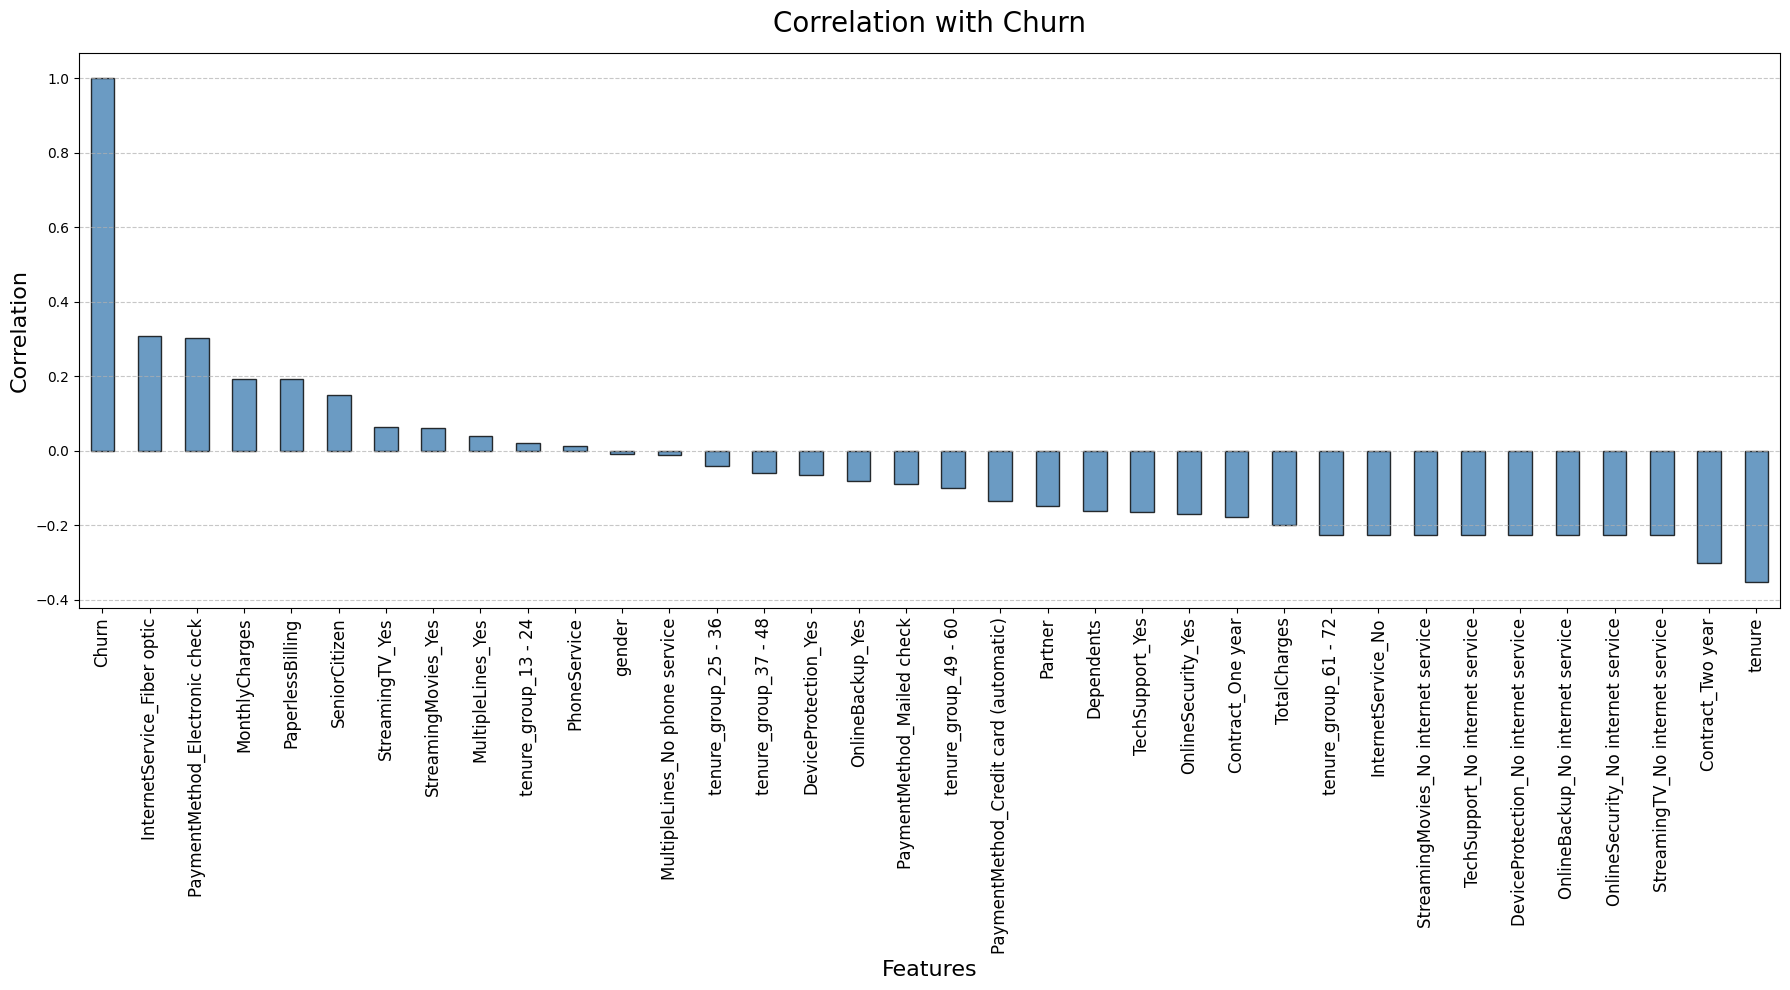

In [ ]:
# Calculate correlations with the target variable
correlations = data.corr()["Churn"].sort_values(ascending=False)

plt.figure(figsize=(18, 10))  # Bigger size for better readability
correlations.plot(kind='bar', color='steelblue', alpha=0.8, edgecolor='black')

plt.title("Correlation with Churn", fontsize=20, pad=15)  # Title with spacing
plt.xlabel("Features", fontsize=16)  # X-axis label
plt.ylabel("Correlation", fontsize=16)  # Y-axis label

plt.xticks(rotation=90, fontsize=12)  # Rotate x-labels for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Horizontal grid lines for better comparison

plt.tight_layout()  # Adjust layout to fit elements nicely
plt.show()


C:\Users\chitt\AppData\Local\Temp\ipykernel_18228\3191708633.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['TotalCharges'].fillna(train_df['TotalCharges'].mean(), inplace=True)


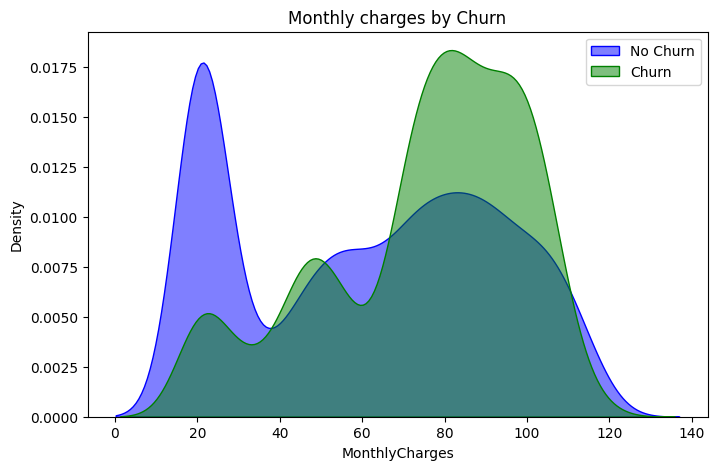

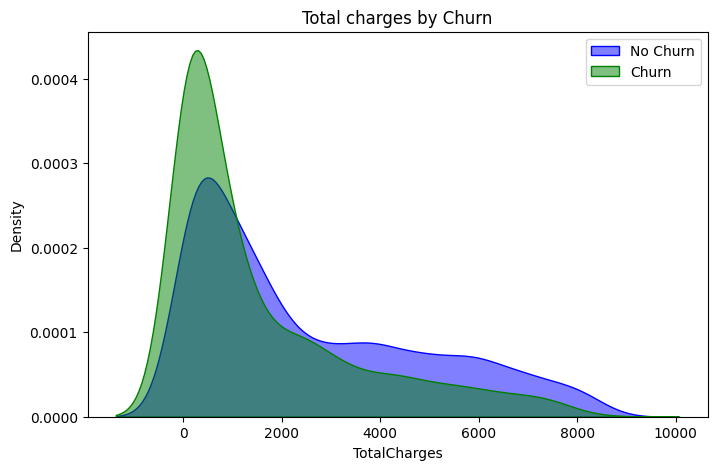

In [ ]:
df=pd.read_csv("data.csv")
train_df, test_df = train_test_split(df, test_size=0.3, random_state=42, stratify=df['Churn'])
train_df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)
train_df['TotalCharges'] = pd.to_numeric(train_df['TotalCharges'], errors='coerce')
train_df['TotalCharges'].fillna(train_df['TotalCharges'].mean(), inplace=True)
train_df.replace(['No internet service', 'No phone service'], 'No', inplace=True)
# One-hot encoding
cat_cols = ['gender', 'InternetService', 'PaymentMethod', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling',
            'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract']
train_df = pd.concat([train_df, pd.get_dummies(train_df[cat_cols])], axis=1).drop(columns=cat_cols)
# Label Encoding
train_df['Churn'] = np.where(train_df['Churn'] == 'Yes', 1, 0)
# Visualization: Monthly Charges and Total Charges distributions
plt.figure(figsize=(8,5))
sns.kdeplot(train_df[train_df['Churn'] == 0]['MonthlyCharges'], fill=True, color='blue', label='No Churn', alpha=0.5)
sns.kdeplot(train_df[train_df['Churn'] == 1]['MonthlyCharges'], fill=True, color='green', label='Churn', alpha=0.5)
plt.title('Monthly charges by Churn')
plt.legend()
plt.show()

plt.figure(figsize=(8,5))
sns.kdeplot(train_df[train_df['Churn'] == 0]['TotalCharges'], fill=True, color='blue', label='No Churn', alpha=0.5)
sns.kdeplot(train_df[train_df['Churn'] == 1]['TotalCharges'], fill=True, color='green', label='Churn', alpha=0.5)
plt.title('Total charges by Churn')
plt.legend()
plt.show()

C:\Users\chitt\AppData\Local\Temp\ipykernel_17464\1666830979.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Churn'], palette='crest')


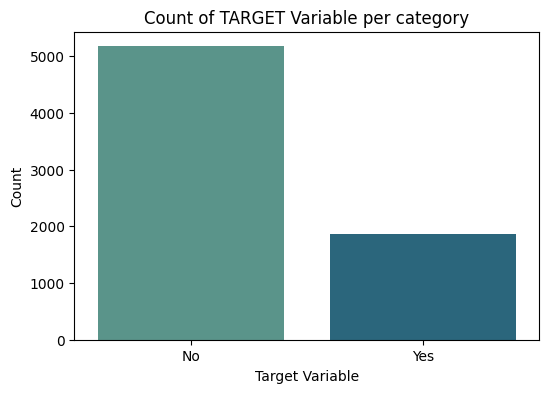

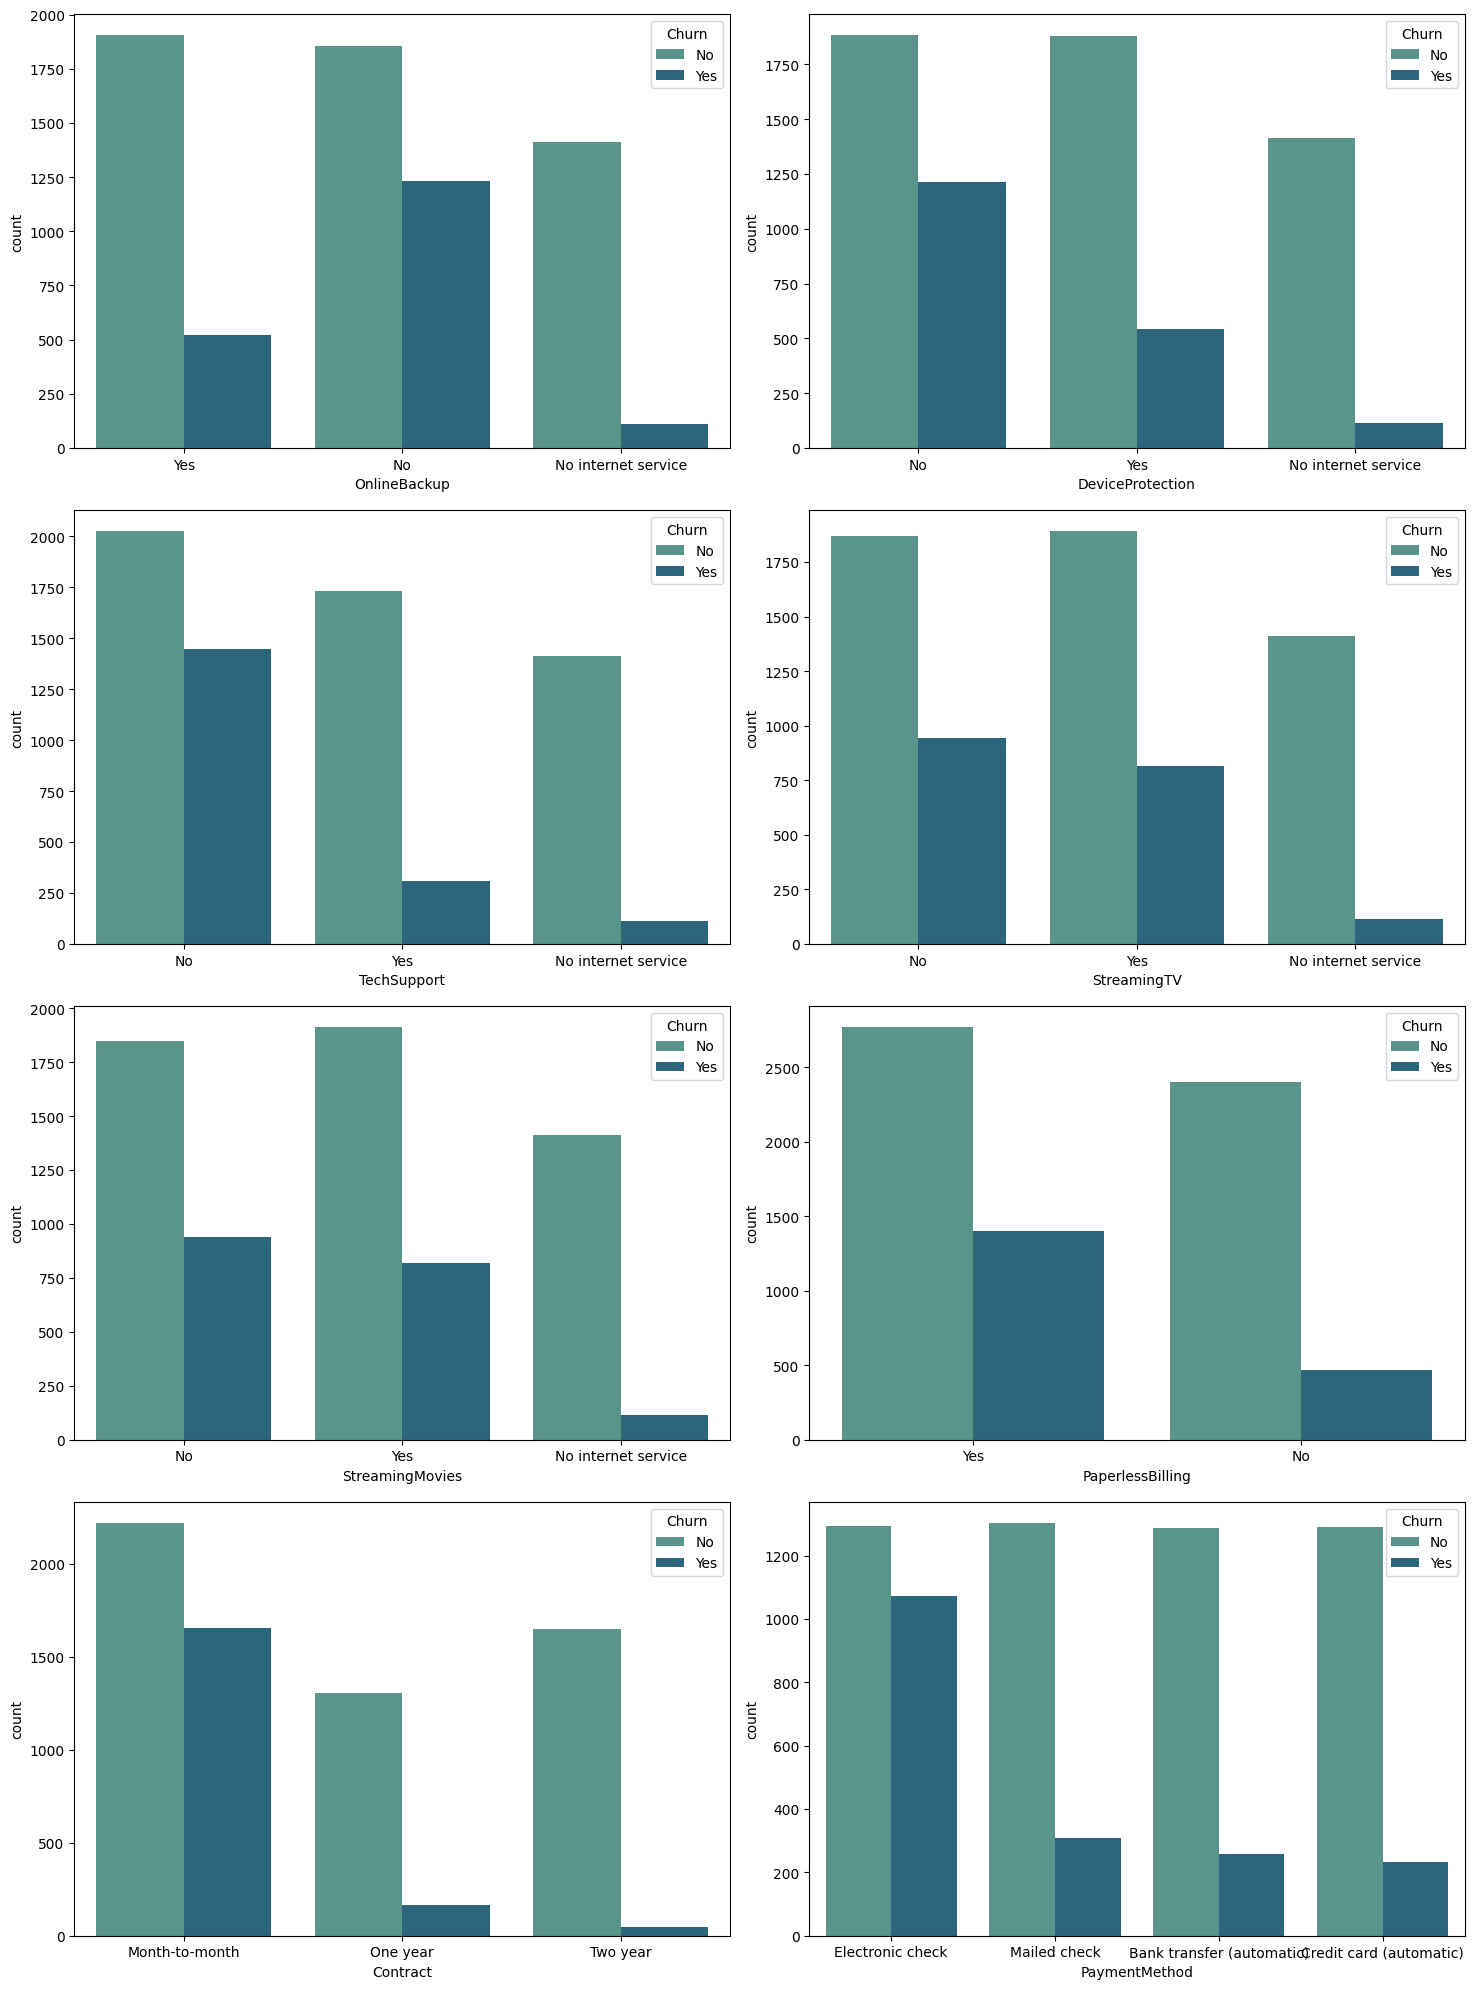

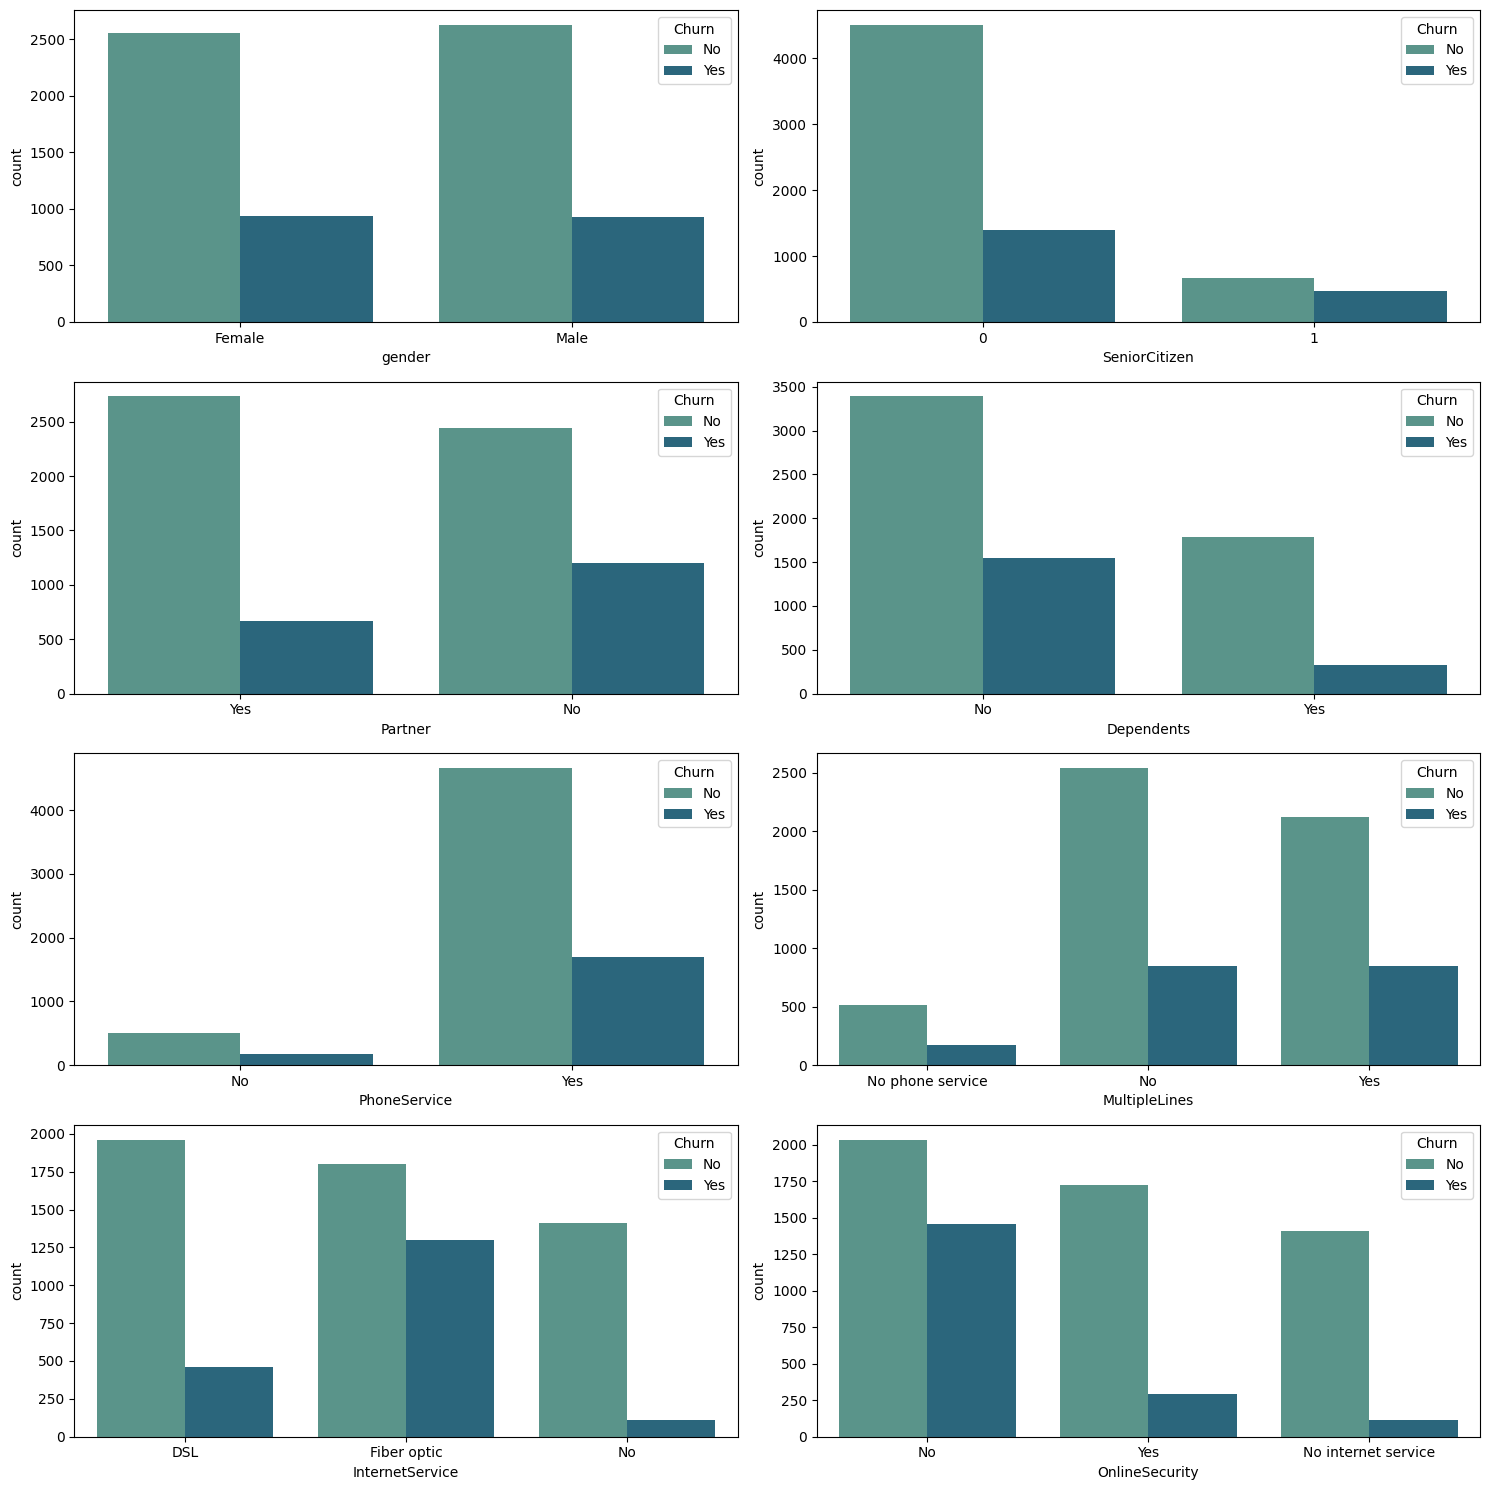

In [ ]:
# Visualization: Count of target variable
plt.figure(figsize=(6,4))
sns.countplot(x=df['Churn'], palette='crest')
plt.title('Count of TARGET Variable per category')
plt.xlabel('Target Variable')
plt.ylabel('Count')
plt.show()

# Visualization: Categorical feature distributions
plt.figure(figsize=(15, 20))
for i, col in enumerate(['OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Contract', 'PaymentMethod']):
    plt.subplot(4, 2, i+1)
    sns.countplot(x=col, hue='Churn', data=df, palette='crest')
plt.tight_layout()
plt.show()

# Visualization: Customer attributes
plt.figure(figsize=(15, 15))
for i, col in enumerate(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity']):
    plt.subplot(4, 2, i+1)
    sns.countplot(x=col, hue='Churn', data=df, palette='crest')
plt.tight_layout()
plt.show()

In [ ]:
# Feature Engineering: tenure bins
condition = [(train_df.tenure <= 12), (train_df.tenure <= 24), (train_df.tenure <= 36),
             (train_df.tenure <= 48), (train_df.tenure <= 60), (train_df.tenure > 60)]
choice = [0, 1, 2, 3, 4, 5]
train_df['tenure_range'] = np.select(condition, choice, default=5)

# Feature Scaling
train_df['MonthlyCharges'] = np.log1p(train_df['MonthlyCharges'])
train_df['TotalCharges'] = np.log1p(train_df['TotalCharges'])

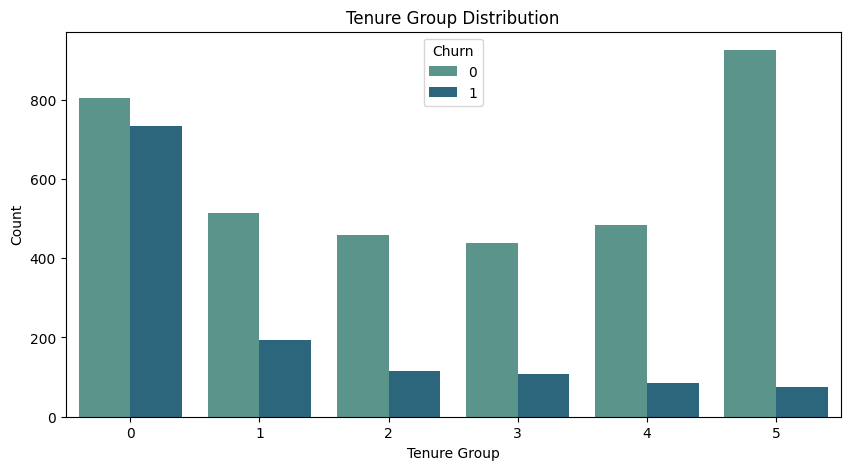

In [ ]:
# Visualization: Tenure group distribution
plt.figure(figsize=(10,5))
sns.countplot(x='tenure_range', hue='Churn', data=train_df, palette='crest')
plt.xlabel('Tenure Group')
plt.ylabel('Count')
plt.title('Tenure Group Distribution')
plt.show()

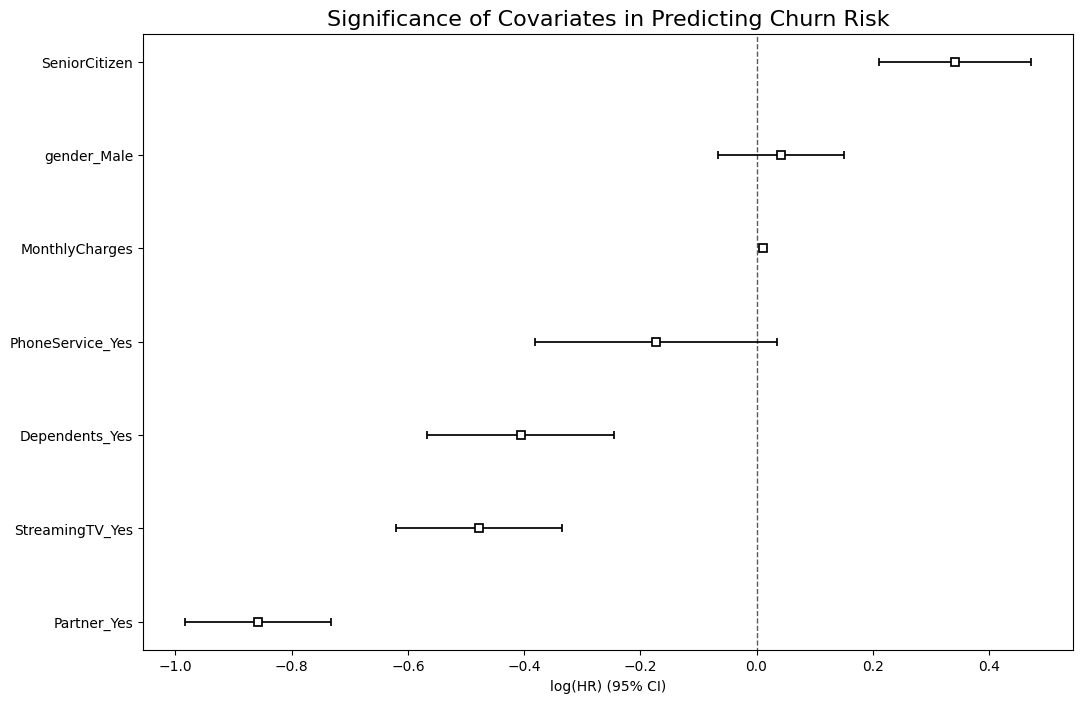

In [ ]:
from lifelines import  CoxPHFitter

# Cox Proportional Hazard Model
required_cols = ['tenure', 'MonthlyCharges', 'SeniorCitizen', 'Churn', 'gender_Male']
categorical_vars = ['Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes', 
                   'StreamingTV_Yes', 'StreamingTV_No internet service']

# Filter available columns
available_cols = [col for col in required_cols + categorical_vars if col in train_df.columns]

# Fit Cox Proportional Hazard Model
cph = CoxPHFitter()
cph.fit(train_df[available_cols], duration_col='tenure', event_col='Churn')

# Plot hazard ratios
plt.figure(figsize=(12, 8))  # Larger figure for better clarity
cph.plot()
plt.title('Significance of Covariates in Predicting Churn Risk', fontsize=16)
plt.show()
